In [0]:
#imports
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [0]:
# Importing data and sorting them into arrays

"""
Data formatted as follows:

data in file: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, 
               capital-gain, capital-loss, hours-per-week, native-country]
               
               data in file: ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
"relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

cont_data: [age, fnlwgt, education_num, capital-gain, capital-loss, hours-per-week]
string_data: [workclass, education, marital-status, occupation, relationship, race, sex, native-country]

"""

cont_data = []
string_data = []
cont_labels = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
string_labels = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']

with open('census_data.txt','r') as f:
    for data in f.readlines():
        line = data.split(', ')      
        cont_data.append([line[i] for i in [0,2,4,10,11,12]])
        string_data.append([line[i].rstrip('\n') for i in [1,3,5,6,7,8,9,13,14]])

cont_data = np.array(cont_data).astype(np.int) # n x d_c array
string_data = np.array(string_data) # n x d_s array

cont_data = np.delete(cont_data, 1, 1) # removing fnlgwt (it doesn't contribute much information)

print(string_data)

# # Recording indices with question marks
# indices = np.unique(np.where(string_data=="?")[0])
# print(indices.shape)
#cont_data = np.delete(cont_data, indices, 0)
#string_data = np.delete(string_data, indices, 0)

#string_data = np.delete(string_data, 3, 1)

[['State-gov' 'Bachelors' 'Never-married' ... 'Male' 'United-States'
  '<=50K']
 ['Self-emp-not-inc' 'Bachelors' 'Married-civ-spouse' ... 'Male'
  'United-States' '<=50K']
 ['Private' 'HS-grad' 'Divorced' ... 'Male' 'United-States' '<=50K']
 ...
 ['Private' 'HS-grad' 'Widowed' ... 'Female' 'United-States' '<=50K']
 ['Private' 'HS-grad' 'Never-married' ... 'Male' 'United-States' '<=50K']
 ['Self-emp-inc' 'HS-grad' 'Married-civ-spouse' ... 'Female'
  'United-States' '>50K']]


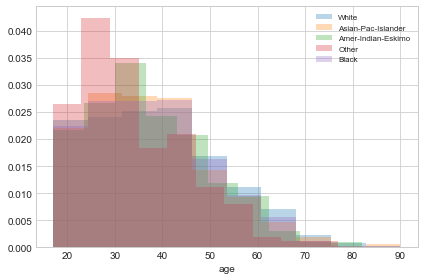

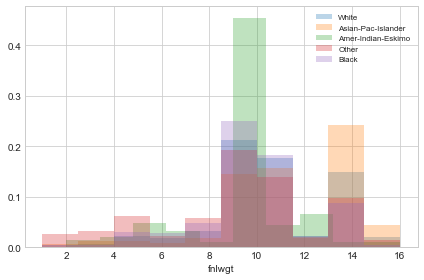

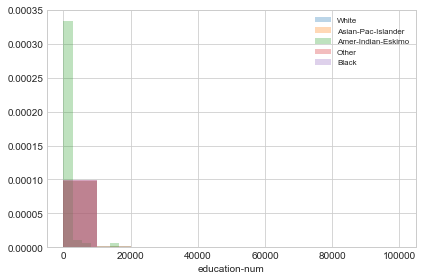

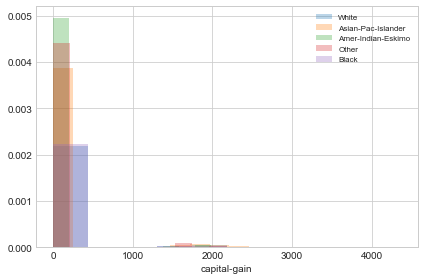

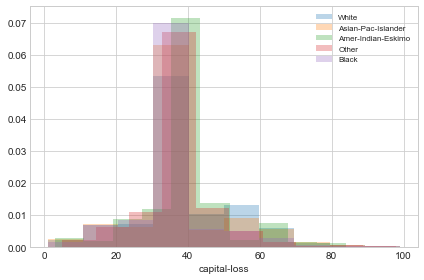

In [0]:
# Plot histograms to see how each of the string variables are distributed among each of the continuous features

feature_dict = {0: 'age', 1: 'fnlwgt', 2: 'education-num', 3: 'capital-gain', 4: 'capital-loss', 5: 'hours-per-week'}

string_dict = {0: ('Self-emp-not-inc','Self-emp-inc','Federal-gov','Local-gov','State-gov','Without-pay', 'Never-worked', '?'),
              5: ('White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black')}

#workclass = {0: 'Private', 1: 'Self-emp-not-inc', 2: 'Self-emp-inc', 3: 'Federal-gov', 4: 'Local-gov', 5: 'State-gov', 
#             6: 'Without-pay', 7: 'Never-worked', 8: '?'}

string_feature = 5

with plt.style.context('seaborn-whitegrid'):
    for cnt in range(cont_data.shape[1]):
        plt.figure()
        for lab in string_dict[string_feature]:
        #for lab in ('Bachelors', 'Some-college', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'):
        #for lab in ('Self-emp-not-inc','Self-emp-inc','Federal-gov','Local-gov','State-gov','Without-pay', 'Never-worked', '?'):
            #plt.hist(cont_data[string_data[:,string_feature]==lab, cnt], label=lab, bins=10, alpha=0.3)
            plt.hist(cont_data[string_data[:,string_feature]==lab, cnt], label=lab, bins=10, alpha=0.3, density=True)
            plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)
        plt.tight_layout()
        plt.show()

#string_dict = 

In [0]:
def visualise_data(X):#Visualization of clustering. You don't need to change this function   
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2])
    plt.show()
    pass

In [0]:
#cont_labels = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# x_var = 3
# y_var = 5

# plt.figure()
# plt.scatter(cont_data[:,x_var], cont_data[:,y_var])
# plt.xlabel(cont_labels[x_var])
# plt.ylabel(cont_labels[y_var])
# plt.show()


In [0]:
#visualise(transformed_cont_data, labels_predict, 3)

## PCA + DBSCAN

In [0]:
# Plotting component vectors
def plot_component_vector(V):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    dim = np.arange(V.shape[0])+1
    ax.bar(dim, np.abs(V)) # plotting first component vector
    plt.xlabel('Component #')
    plt.ylabel('Absolute value of first component direction')
    plt.savefig('component_distribution.png',bbox_inches='tight')

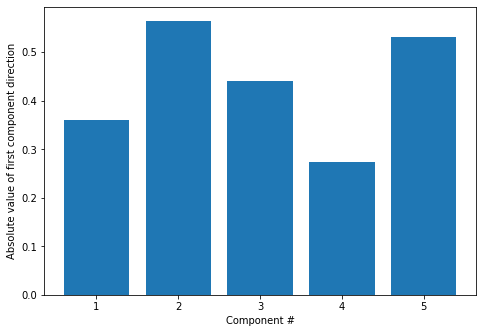

In [0]:
# Preprocessing with standard scaling (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
#scaler = RobustScaler()
scaler = StandardScaler()
data = scaler.fit_transform(cont_data.astype(np.float64))
pca_ignore = PCA(n_components='mle')
pca_ignore.fit(data)
plot_component_vector(pca_ignore.components_[0,:])
# pca_object = PCA(n_components = 3)
# pca_object_transform = pca_object.fit_transform(data)
# components = pca_object.components_
# plot_component_vector(components[0,:])
# print('No. of components: ' + str(pca_object.n_components_))
# print('Explained variance: ' + str(pca_object.explained_variance_))
# print('Variance ratio: ' + str(pca_object.explained_variance_ratio_))
# print(np.sum(pca_object.explained_variance_ratio_))

In [0]:
# Let's do elbow method to determine best epsilon and then test dbscan with different min_samples
# Euclidean distance is used
nn_dist = []
nn = 20
# for n in pca_object_transform:
#     diff = n - pca_object_transform
for n in data:
    diff = n - data
    dist = np.sum(diff**2, axis=1)
    
    dist = np.sort(dist)
    nn_dist.append(dist[nn-1])

nn_dist = np.array(nn_dist)
nn_dist = np.sort(nn_dist)

eps: 1.571286896664427


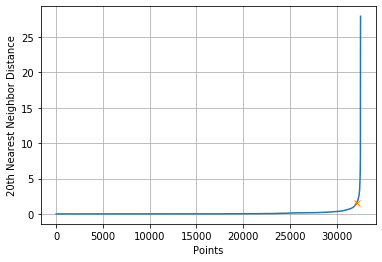

In [0]:
# Plot and visually identify elbow point to choose epsilon
plt.plot(np.arange(nn_dist.shape[0])+1, nn_dist)
plt.plot(32150, nn_dist[32150], 'x', )
plt.xlabel('Points')
plt.ylabel('20th Nearest Neighbor Distance')
plt.grid(True)
print('eps: ' + str(nn_dist[32150]))
eps = nn_dist[32150]
plt.savefig('dbscan_elbow.png')

In [0]:
# Perform DBSCAN and get the labels for each point
dbscan_obj = DBSCAN(eps=eps, min_samples=20)
labels = dbscan_obj.fit_predict(data)

44


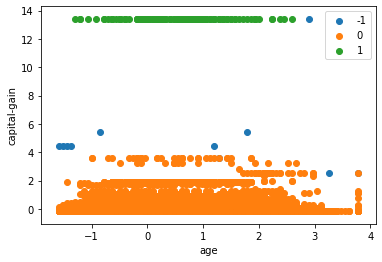

In [0]:
# Show representation of DBSCAN results
for i in np.unique(labels).tolist():
    plt.scatter(data[labels==i,0], data[labels==i,2])
plt.xlabel('age')
plt.ylabel('capital-gain')
plt.legend(np.unique(labels))
plt.savefig('dbscan_results.png')

# Find indices of datapoints labeled "noisy" and remove those rows from the cont_data and string_data matrices.
# DON'T RUN TWICE OR ELSE YOU'LL CUT DATA TWICE AND YOU'LL FUCK UP
indices = np.where(labels==-1)[0]
cont_data = np.delete(cont_data, indices, 0)
string_data = np.delete(string_data, indices, 0)
data = np.delete(data, indices, 0)

print(indices.size)

# print(string_data[indices,:].tolist())

19


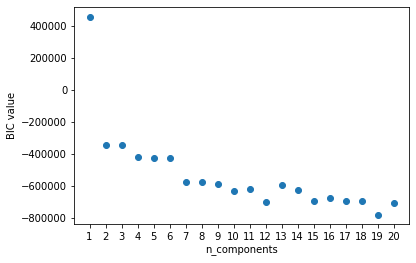

In [0]:
# Figure out which model has the lowest BIC value (it's the one we're going to use)

n_components = np.arange(1, 21)
models = [GaussianMixture(n).fit(data) for n in n_components]

bic = [m.bic(data) for m in models]

plt.scatter(n_components, bic, label='BIC')
plt.xticks(np.arange(20)+1)
#plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
#plt.legend(loc='best')
plt.xlabel('n_components');
plt.ylabel('BIC value');
plt.savefig('gmm_bic.png',bbox_inches='tight')

min_bic = bic.index(min(bic))
print(n_components[min_bic])

#gmm = GaussianMixture(n_components=3).fit(cont_data)

In [0]:
gmm_labels = GaussianMixture(n_components[min_bic]).fit_predict(data)
question_indices = np.unique(np.where(string_data=="?")[0])
for i in question_indices:
    cluster = string_data[gmm_labels==gmm_labels[i],:]
#     print(string_data[i,:])
    #print(cluster)
    for c in range(string_data.shape[1]):
        if string_data[i,c] == "?":
            categories, counts = np.unique(cluster[:,c], return_counts=True)
            vote = categories[np.argmax(counts)]
            while vote == "?":
                #print('huh?')
                categories = np.delete(categories, np.argmax(counts))
                counts = np.delete(counts, np.argmax(counts))
                vote = categories[np.argmax(counts)]
            string_data[i,c] = categories[np.argmax(counts)]
#             print(categories)
#             print(counts)
#             print(categories[np.argmax(counts)])
#     for c in range(string_data.shape[1]):
#         if string_data[i,c] == "?":
#             categories, counts = np.unique(cluster[:,c], return_counts=True)
#             string_data[i,c] = categories[np.argmax(counts)]
#             print(categories[np.argmax(counts)])
            
        



In [0]:
#print(question_indices)
print(np.unique(np.where(string_data=="?")[0]))

[]


In [0]:
# export cont_data and string_data into pandas and then do csv export
headers = ["age", "workclass", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", 
               "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

data_dict = {}
cont_i = 0
str_i = 0
for h in headers:
    if h in cont_labels:
        data_dict[h] = cont_data[:,cont_i].tolist()
        cont_i = cont_i + 1
    else:
        data_dict[h] = string_data[:,str_i].tolist()
        str_i = str_i + 1
    #data_dict[h]=
# cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
#         'Price': [22000,25000,27000,35000]
#         }

df = pd.DataFrame(data_dict, columns=headers)
print(df)
df.to_csv (r'C:\Users\tiger\Dropbox (GaTech)\School\ML Spring 2020\Project\adjusted_data.csv', index = False, header=True)

       age         workclass   education  education-num      marital-status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32512   27           Private  Assoc-acdm             12  Married-civ-spouse   
32513   40           Private     HS-grad              9  Married-civ-spouse   
32514   58           Private     HS-grad              9             Widowed   
32515   22           Private     HS-grad              9       Never-married   
32516   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

              occupation   relationship   race     